Question 1: What is Simple Linear Regression?


---



Ans: Simple Linear Regression is a statistical method used to model and analyze the relationship between two variables:

One independent variable (X) — the predictor or input

One dependent variable (Y) — the outcome or response

It assumes that the relationship between X and Y can be approximated by a straight line.

Mathematical Form

𝑌=𝛽
0
+
𝛽
1
𝑋
+
𝜀




Where:

𝛽
0 = intercept (value of Y when X = 0)

𝛽
1= slope (change in Y for a one-unit change in X)

ε = error term (difference between observed and predicted values)


Purpose

To predict the value of Y based on X

To quantify the strength and direction of the relationship between X and Y

Example

Predicting house price (Y) based on house size (X).



Question 2: What are the key assumptions of Simple Linear Regression?


---

Ans:  The key assumptions of Simple Linear Regression are:

Linearity:  
The relationship between the independent variable (X) and the dependent variable (Y) is linear.

Independence:  
The observations (errors) are independent of each other.

Homoscedasticity:  
The variance of the error terms is constant across all values of X.

Normality of Errors:  
The residuals (errors) are normally distributed, especially important for hypothesis testing.

No or Minimal Outliers:  
There are no extreme outliers that unduly influence the regression line.



Question 3: What is heteroscedasticity, and why is it important to address in regression
models?


---

Ans: Heteroscedasticity occurs in a regression model when the variance of the error terms (residuals) is not constant across all levels of the independent variable(s).

Explanation

In a heteroscedastic model, residuals may fan out or contract as the value of X increases.

This violates the homoscedasticity assumption of linear regression.

Why It Is Important to Address

Invalid Standard Errors
Heteroscedasticity leads to biased standard errors, making hypothesis tests (t-tests, F-tests) unreliable.

Incorrect Confidence Intervals
Confidence intervals may be too wide or too narrow, leading to misleading conclusions.

Reduced Efficiency
Although coefficient estimates remain unbiased, they are no longer the most efficient (best) estimates.



How It Can Be Addressed

Transforming variables (e.g., log transformation)

Using heteroscedasticity-robust standard errors

Applying weighted least squares

Question 4: What is Multiple Linear Regression?

---
Multiple Linear Regression (MLR) is an extension of simple linear regression that models the relationship between one dependent variable and two or more independent variables.

Mathematical Form       
𝑌=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑘
𝑋
𝑘
+
𝜀


Where:

Y = dependent (response) variable

X
1
,X
2,…,Xk = independent (predictor) variables

𝛽
0
 = intercept

β
1
,β
2
,…,β
k
 = regression coefficients

ε = error term

Purpose

To predict the value of Y using multiple factors

To assess the individual impact of each independent variable while holding others constant

Example

Predicting house price based on size, location, and number of bedrooms.


Question 5: What is polynomial regression, and how does it differ from linear
regression?


---

Ans: Polynomial Regression is a type of regression analysis that models the relationship between the independent variable and the dependent variable as an nth-degree polynomial.

Mathematical Form

For a second-degree (quadratic) polynomial:

𝑌 =
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
𝜀


Although polynomial regression models a nonlinear relationship, it is still considered a linear regression model because it is linear in the parameters (
β's).

Example

Linear regression: Predicting growth as a straight line

Polynomial regression: Predicting growth that accelerates or decelerates over time

Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.


---



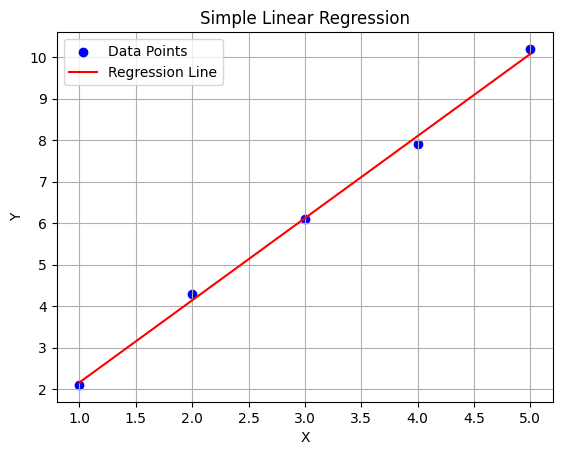

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.


---



In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dataset
df = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Define variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Add constant
X_const = sm.add_constant(X)

# Fit Multiple Linear Regression model
model = sm.OLS(y, X_const).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print("VIF Results:")
print(vif_data)


VIF Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.


---



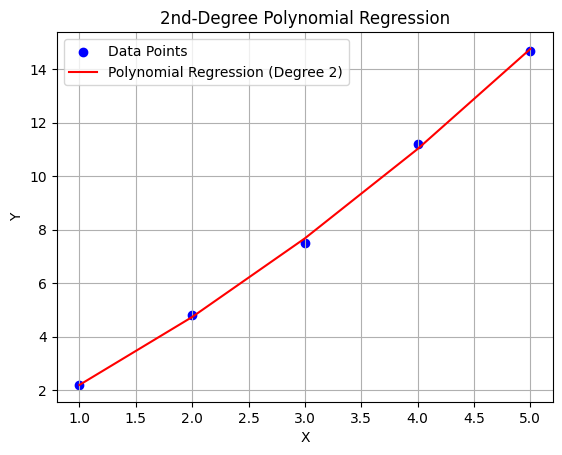

Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform X to include polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, Y)

# Make predictions
Y_pred = model.predict(X_poly)

# Plot data points and polynomial curve
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd-Degree Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

# Display coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

---



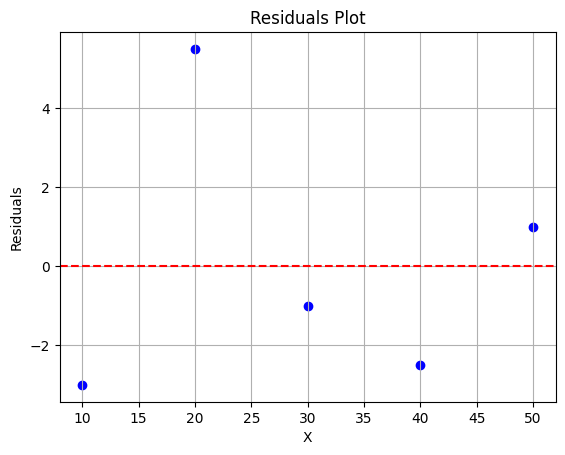

X=10, Residual=-3.00
X=20, Residual=5.50
X=30, Residual=-1.00
X=40, Residual=-2.50
X=50, Residual=1.00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Print residuals
for i, res in enumerate(residuals):
    print(f"X={X[i][0]}, Residual={res:.2f}")


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


---

Ans: comprehensive approach to address heteroscedasticity and multicollinearity when predicting house prices:

1. Addressing Heteroscedasticity

Heteroscedasticity occurs when the variance of residuals is not constant, which can make standard errors unreliable. Steps to handle it:

a) Transform the Dependent Variable

Apply transformations to stabilize variance, such as:
Log transformation:

Price
new=
log
⁡
(
Price
)
Price
new
=log(Price)

Square root or Box-Cox transformation

Example: Using np.log(Price) in Python often stabilizes spread.

b) Weighted Least Squares (WLS)

Give lower weight to observations with higher variance.

WLS can reduce the influence of outliers with large errors.

c) Robust Standard Errors

Use heteroscedasticity-robust standard errors (e.g., statsmodels HC3) to make inference reliable without transforming data.

2. Addressing Multicollinearity

Multicollinearity occurs when predictors are highly correlated, inflating standard errors. Steps to handle it:

a) Check VIF (Variance Inflation Factor)

Remove or combine variables with high VIF (> 5 or 10).

b) Feature Selection

Drop redundant variables or use domain knowledge to retain the most relevant features.

Example: If area and number of rooms are highly correlated, consider keeping only one or combining them.

c) Regularization Techniques

Apply Ridge Regression (L2 penalty) or Lasso Regression (L1 penalty):

Ridge reduces coefficient magnitude for correlated predictors.

Lasso can even eliminate some features to reduce multicollinearity.

d) Principal Component Analysis (PCA)

Transform correlated features into uncorrelated principal components and use them in regression.

3. Model Validation

Always validate using cross-validation to ensure your fixes improve predictive performance.

Check residual plots after adjustments to ensure heteroscedasticity is minimized.

Evaluate metrics like RMSE, MAE, and R² to compare models.

4. Practical Steps for Your Real Estate Model

Examine residuals for heteroscedasticity (residuals vs. fitted plot).

Transform Price (e.g., log) or use robust regression if needed.

Compute VIF for features like area, rooms, and location.

Drop or combine highly correlated features, or use Ridge/Lasso regression.

Refit the model and validate predictions on a test set.

Visualize residuals again to ensure assumptions are met.